# Método de tendência linear de Holt

Utilizando modelo de suavização exponencial com tendência linear de Holt para prever preço do óleo na Arabia Saudita

* Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Lendo arquivo Excel

In [2]:
dados = pd.read_csv('BrentOilPrices.csv')

* Exibindo cinco primeiras linhas

In [3]:
dados.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [4]:
dados['Date'] = pd.to_datetime(dados['Date'])

* Definindo ano como índice

In [5]:
dados = dados.set_index('Date')

* Graficando série temporal

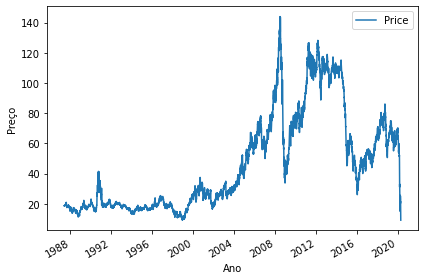

In [6]:
dados.plot()
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.tight_layout()

* Criando amostras de treino e teste

In [7]:
t_treino = dados[dados.index<'2016-01-01'].index.values
t_teste = dados[dados.index>='2016-01-01'].index.values
X_treino = dados[dados.index<'2016-01-01'].values
X_teste = dados[dados.index>='2016-01-01'].values

* Aplicando modelo Exponential Smoothing

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing, Holt, SimpleExpSmoothing

In [9]:
fit1 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
fit1 = fit1.forecast(len(X_teste))

fit2 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.3)
fit2 = fit2.forecast(len(X_teste))

fit3 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.5)
fit3 = fit3.forecast(len(X_teste))

fit4 = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.7)
fit4 = fit4.forecast(len(X_teste))

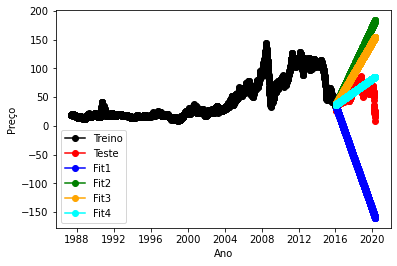

In [10]:
plt.plot(t_treino,X_treino, marker='o', color='black',label='Treino')
plt.plot(t_teste,X_teste, marker='o', color='red',label='Teste')
plt.plot(t_teste,fit1, marker='o', color='blue',label='Fit1')
plt.plot(t_teste,fit2, marker='o', color='green',label='Fit2')
plt.plot(t_teste,fit3, marker='o', color='orange',label='Fit3')
plt.plot(t_teste,fit4, marker='o', color='cyan',label='Fit4')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend()

In [11]:
fit4a = Holt(X_treino).fit(smoothing_level = 0.1,smoothing_slope = 0.7)
fit4a = fit4a.forecast(len(X_teste))

fit4b = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.7)
fit4b = fit4b.forecast(len(X_teste))

fit4c = Holt(X_treino).fit(smoothing_level = 0.5,smoothing_slope = 0.7)
fit4c = fit4c.forecast(len(X_teste))

fit4d = Holt(X_treino).fit(smoothing_level = 0.7,smoothing_slope = 0.7)
fit4d = fit4d.forecast(len(X_teste))

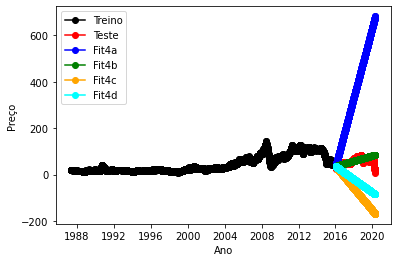

In [12]:
plt.plot(t_treino,X_treino, marker='o', color='black',label='Treino')
plt.plot(t_teste,X_teste, marker='o', color='red',label='Teste')
plt.plot(t_teste,fit4a, marker='o', color='blue',label='Fit4a')
plt.plot(t_teste,fit4b, marker='o', color='green',label='Fit4b')
plt.plot(t_teste,fit4c, marker='o', color='orange',label='Fit4c')
plt.plot(t_teste,fit4d, marker='o', color='cyan',label='Fit4d')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend()

* Calculando erros

In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
MSE_fit4a = mean_squared_error(X_teste,fit4a)
MSE_fit4b = mean_squared_error(X_teste,fit4b)
MSE_fit4c = mean_squared_error(X_teste,fit4c)
MSE_fit4d = mean_squared_error(X_teste,fit4d)

In [15]:
RMSE_fit4a = np.sqrt(MSE_fit4a)
RMSE_fit4b = np.sqrt(MSE_fit4b)
RMSE_fit4c = np.sqrt(MSE_fit4c)
RMSE_fit4d = np.sqrt(MSE_fit4d)

In [16]:
print("RMSE (SL=0.1) = {:0.2f}".format(RMSE_fit4a))
print("RMSE (SL=0.3) = {:0.2f}".format(RMSE_fit4b))
print("RMSE (SL=0.5) = {:0.2f}".format(RMSE_fit4c))
print("RMSE (SL=0.7) = {:0.2f}".format(RMSE_fit4d))

RMSE (SL=0.1) = 351.56
RMSE (SL=0.3) = 14.36
RMSE (SL=0.5) = 140.60
RMSE (SL=0.7) = 92.48


In [17]:
best = 1e6
i_best = 0
j_best = 0
for i in range(1,10):
    for j in range(50,90):
        ind1 = i/10
        ind2 = j/100
        fit_final = Holt(X_treino).fit(smoothing_level=ind1,smoothing_slope=ind2)
        fit_final = fit_final.forecast(len(X_teste))
        MSE = mean_squared_error(X_teste,fit_final)
        RMSE = np.sqrt(MSE)
        if(RMSE<best):
            best = RMSE
            i_best = ind1
            j_best = ind2
        print("SS= {}, SL={}, RMSE={}".format(i_best,j_best,RMSE))

print("Melhor smoothing_level = {}".format(i_best/10.0))
print("Melhor smoothing_slope = {}".format(j_best/100))

SS= 0.1, SL=0.5, RMSE=79.20720260215218
SS= 0.1, SL=0.5, RMSE=92.69164963577683
SS= 0.1, SL=0.5, RMSE=105.86669640487075
SS= 0.1, SL=0.5, RMSE=118.72840494827123
SS= 0.1, SL=0.5, RMSE=131.30303615185883
SS= 0.1, SL=0.5, RMSE=143.64088368178363
SS= 0.1, SL=0.5, RMSE=155.8108004187976
SS= 0.1, SL=0.5, RMSE=167.8948806202646
SS= 0.1, SL=0.5, RMSE=179.9832565930797
SS= 0.1, SL=0.5, RMSE=192.16912793106164
SS= 0.1, SL=0.5, RMSE=204.544174529566
SS= 0.1, SL=0.5, RMSE=217.19448756376352
SS= 0.1, SL=0.5, RMSE=230.19711627522844
SS= 0.1, SL=0.5, RMSE=243.61728630079807
SS= 0.1, SL=0.5, RMSE=257.50630376275967
SS= 0.1, SL=0.5, RMSE=271.9001218351044
SS= 0.1, SL=0.5, RMSE=286.81851527504546
SS= 0.1, SL=0.5, RMSE=302.2647851822253
SS= 0.1, SL=0.5, RMSE=318.2259022096047
SS= 0.1, SL=0.5, RMSE=334.6729920739265
SS= 0.1, SL=0.5, RMSE=351.56207209562456
SS= 0.1, SL=0.5, RMSE=368.83496030212683
SS= 0.1, SL=0.5, RMSE=386.4202971608141
SS= 0.1, SL=0.5, RMSE=404.23464141236155
SS= 0.1, SL=0.5, RMSE=422.18

SS= 0.3, SL=0.74, RMSE=72.87569081907961
SS= 0.3, SL=0.74, RMSE=76.55829269307618
SS= 0.3, SL=0.74, RMSE=80.29245379306876
SS= 0.3, SL=0.74, RMSE=84.07060947987546
SS= 0.3, SL=0.74, RMSE=87.88536093146053
SS= 0.3, SL=0.74, RMSE=91.72943976054918
SS= 0.3, SL=0.74, RMSE=95.59567770634585
SS= 0.3, SL=0.74, RMSE=99.47698097888035
SS= 0.3, SL=0.74, RMSE=103.36630882791697
SS= 0.3, SL=0.74, RMSE=107.25665592924044
SS= 0.3, SL=0.74, RMSE=111.1410382159093
SS= 0.3, SL=0.74, RMSE=115.0124818218739
SS= 0.3, SL=0.74, RMSE=118.86401484482877
SS= 0.3, SL=0.74, RMSE=122.68866167044268
SS= 0.3, SL=0.74, RMSE=126.4794396298465
SS= 0.3, SL=0.74, RMSE=130.22935778576937
SS= 0.3, SL=0.74, RMSE=133.93141766007142
SS= 0.3, SL=0.74, RMSE=137.57861572759404
SS= 0.3, SL=0.74, RMSE=141.16394750881815
SS= 0.3, SL=0.74, RMSE=144.68041309824895
SS= 0.3, SL=0.74, RMSE=148.12102396760739
SS= 0.3, SL=0.74, RMSE=151.47881088366125
SS= 0.3, SL=0.74, RMSE=154.74683278144403
SS= 0.3, SL=0.74, RMSE=157.91818643435906
SS=

KeyboardInterrupt: 

# Melhor ajuste

In [18]:
fit_best = Holt(X_treino).fit(smoothing_level = 0.3,smoothing_slope = 0.74)
fit_best = fit_best.forecast(len(X_teste))

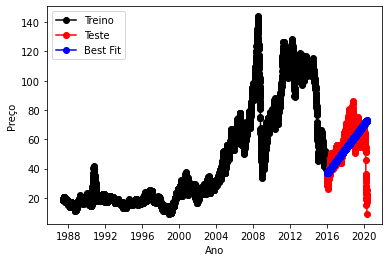

In [19]:
plt.plot(t_treino,X_treino, marker='o', color='black',label='Treino')
plt.plot(t_teste,X_teste, marker='o', color='red',label='Teste')
plt.plot(t_teste,fit_best, marker='o', color='blue',label='Best Fit')
plt.xlabel('Ano')
plt.ylabel('Preço')
plt.legend()